In [63]:
import numpy as np
import pandas as pd
import pyarrow as pa
import joblib
import dask.dataframe as dd
df = dd.read_parquet("gcs://ds352-data/clustering-1")
data = df.dropna()

In [8]:
from dask.distributed import Client
from dask_kubernetes.operator import KubeCluster
cluster = KubeCluster(name='cluster2', image='ghcr.io/patmagauran/mldocker-base:main',env={'EXTRA_CONDA_PACKAGES':''}, resources={"requests": {"memory": "6Gi"}, "limits": {"memory": "6Gi"}}  )
#cluster = KubeCluster.from_name(name="foo")
#cluster.adapt(minimum=4, maximum=8)
cluster.scale(5)

In [9]:
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_kubernetes.KubeCluster
Dashboard: http://localhost:8786/status,
Dashboard: http://localhost:8786/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.56.1.4:8786,Workers: 0
Dashboard: http://10.56.1.4:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


# All Selected Data

## K-Means

Text(0, 0.5, 'SSE')

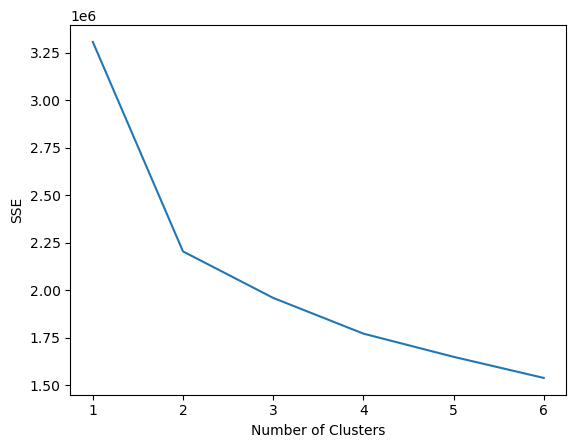

In [11]:
import matplotlib.pyplot as plt
from sklearn import cluster

%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [7]:
data = df.dropna()
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data) 
##labels = k_means.labels_
##pd.DataFrame(labels, columns=['Cluster ID'])
k_means


KMeans(max_iter=50, n_clusters=2, random_state=1)

In [8]:
k_means.cluster_centers_

array([[ 6.72560336e+00,  4.14779643e+00,  7.69790136e+00,
         1.17523610e-02,  8.02465897e-01,  2.19905561e+00,
         1.81416579e+00,  1.44664218e+00,  8.84784890e-01,
         1.39034627e-02,  1.10703043e-02,  1.68415530e-01,
         5.89192025e-02,  1.98268625e-01,  8.17943337e-02,
         3.46799580e-01,  4.00314795e-02,  1.64270724e-01,
         4.13116474e-01,  7.73504722e-01,  1.56086044e-01,
         8.27911857e-02,  1.01783841e-02,  2.55508919e-02,
         3.30535152e-02,  3.50996852e-02,  3.68835257e-02,
         2.44648478e-01,  7.74396642e-02,  6.45330535e-02,
         1.55036726e-01,  2.93809024e-03,  6.29590766e-03,
         1.78384050e-03,  7.03043022e-03,  5.77124869e-04,
         1.99370409e-03,  5.29905561e-03,  1.95697796e-02,
         1.79958027e-02,  4.72193075e-04,  1.46904512e-03,
         3.18934942e+00,  6.47953830e-02,  4.04124111e+01,
        -7.67655907e+01],
       [ 6.81654521e+00,  4.11176081e+00,  1.71411988e+01,
         1.03407552e-02,  9.24

## K-Means Normalized

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized = scaler.fit_transform(data)

In [66]:
normalized

array([[-0.2487076 , -0.06379625,  1.14033818, ..., -0.20243378,
        -0.89398022,  0.84007776],
       [-0.56581008,  0.9607732 ,  0.95658329, ..., -0.20243378,
        -0.14489273,  0.43927248],
       [-0.56581008,  1.47305793,  0.95658329, ..., -0.20243378,
        -0.50014941,  0.85921205],
       ...,
       [ 1.33680482,  0.9607732 ,  0.40531864, ..., -0.20243378,
        -0.29279372, -0.06319279],
       [ 1.6539073 ,  1.47305793, -1.24847531, ..., -0.20243378,
         0.54906118, -1.89382955],
       [ 1.01970234, -0.06379625,  0.03780887, ..., -0.20243378,
         1.55875015, -0.15248058]])

Text(0, 0.5, 'SSE')

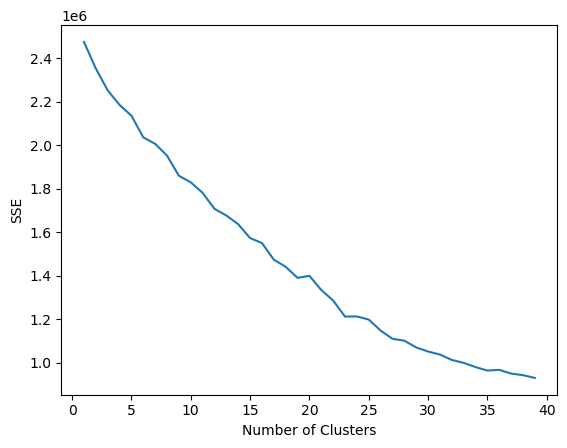

In [72]:
import matplotlib.pyplot as plt
from sklearn import cluster

%matplotlib inline

numClusters = list(range(1, 40))
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(normalized)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'SSE')

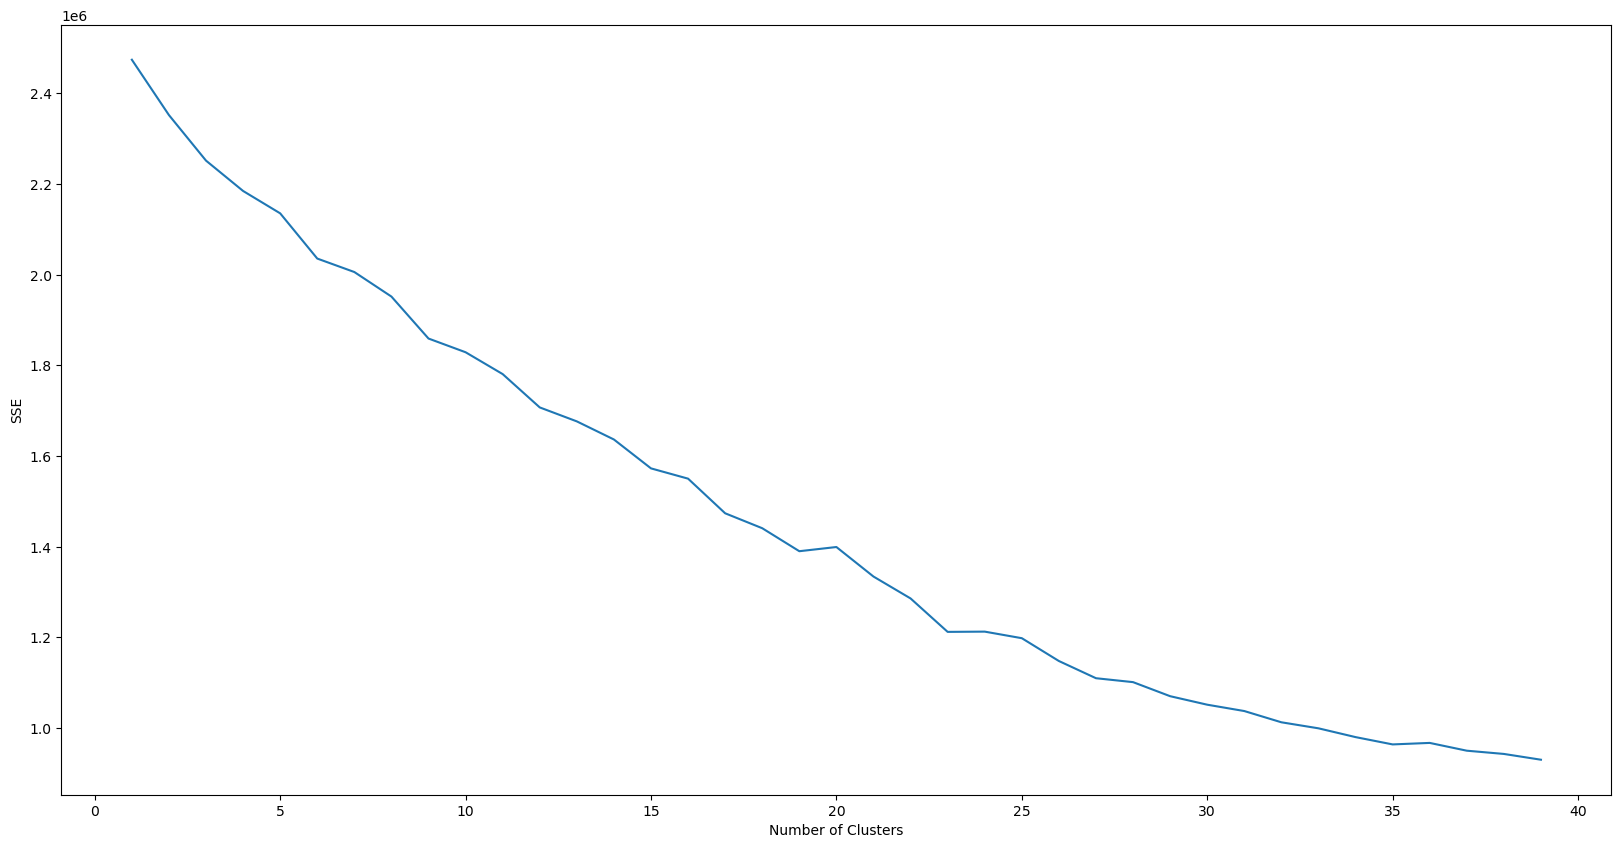

In [74]:
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')


In [75]:
data = df.dropna()
k_means = cluster.KMeans(n_clusters=6, max_iter=50, random_state=1)
k_means.fit(normalized) 
##labels = k_means.labels_
##pd.DataFrame(labels, columns=['Cluster ID'])
k_means


KMeans(max_iter=50, n_clusters=6, random_state=1)

In [76]:
k_means.cluster_centers_

array([[-3.37288827e-02,  3.43265934e-02, -4.12600242e-02,
        -7.35768967e-02, -2.54908976e-02,  4.15042659e-01,
         6.04396419e-01,  1.22133279e+00,  7.99949184e-01,
        -1.34367350e-01, -9.70096858e-02,  2.68875640e-01,
        -1.40091259e-01,  3.11245008e-01,  1.78285770e-01,
        -8.70483573e-01, -1.81914722e-01, -9.56636939e-02,
         4.96732204e-02, -4.23546621e-02,  3.92218009e-02,
         1.58374370e-02,  8.81126821e-02,  1.41445710e-01,
         1.59370077e-01,  1.45262161e-01,  1.25838402e-01,
         2.64524005e-01,  1.72050210e-01,  1.64204397e-01,
         1.11770892e-01, -1.84203132e-02, -6.15468032e-02,
        -3.33801054e-02, -6.55973716e-02, -2.63651475e-02,
        -4.95665227e-02, -6.54230393e-02, -1.59892022e-01,
        -1.04642802e-01, -5.84909739e-03, -2.63386701e-02,
        -2.26386074e-01, -1.94143648e-01,  2.35595190e-02,
        -9.11255810e-02],
       [ 1.98385668e-02, -2.16394837e-02,  1.89598064e-01,
         3.34871067e-01,  3.27

## K-Means PCA

In [17]:
from sklearn.decomposition import PCA
X = df.dropna()
pca = PCA(n_components=2)
dataPCA = pca.fit_transform(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)
dataPCA

[0.48367431 0.16205575]
[1264.47709576  731.92517579]


array([[-6.45219201,  0.4876908 ],
       [-5.2227487 ,  1.80696831],
       [-5.22993756,  1.79331038],
       ...,
       [-2.24689335, -4.12286336],
       [ 7.01566435, -4.92004405],
       [-0.25853071, -3.22209873]])

Text(0, 0.5, 'SSE')

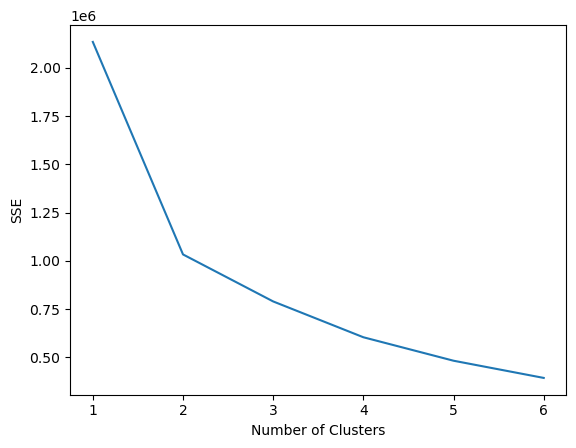

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(dataPCA)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [19]:
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(dataPCA) 
##labels = k_means.labels_
##pd.DataFrame(labels, columns=['Cluster ID'])
k_means.cluster_centers_

array([[ 6.10925536, -0.02834524],
       [-3.35241056,  0.01555425]])

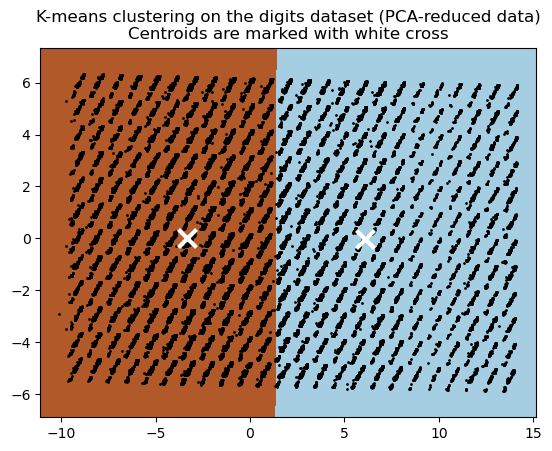

In [23]:
# Plot the decision boundary. For that, we will assign a color to each

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].
reduced_data = dataPCA
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = k_means.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the PCA-reduced data \n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.xticks(())
#plt.yticks(())
plt.show()

dataH = data[['Bicycle Count', 'Bicycle Death Count', 'Bicycle Suspected Serious Injury Count', 'Crash Month', 'Day of Week', 'Hour of Day']]
verte2 = dataH.groupby('Crash Month').sum()## Hierarchy

In [53]:
dataH = data[['Bicycle Count', 'Bicycle Death Count', 'Bicycle Suspected Serious Injury Count', 'Crash Month', 'Day of Week', 'Hour of Day']]
verte2 = dataH[['Bicycle Count', 'Bicycle Death Count', 'Bicycle Suspected Serious Injury Count', 'Crash Month']].groupby('Crash Month').sum()
verte2 = verte2.reset_index()
verte2

,Crash Month,Bicycle Count,Bicycle Death Count,Bicycle Suspected Serious Injury Count
npartitions=1,,,,
,int64,UInt8,UInt8,UInt8
,...,...,...,...


In [52]:
#verte2.index


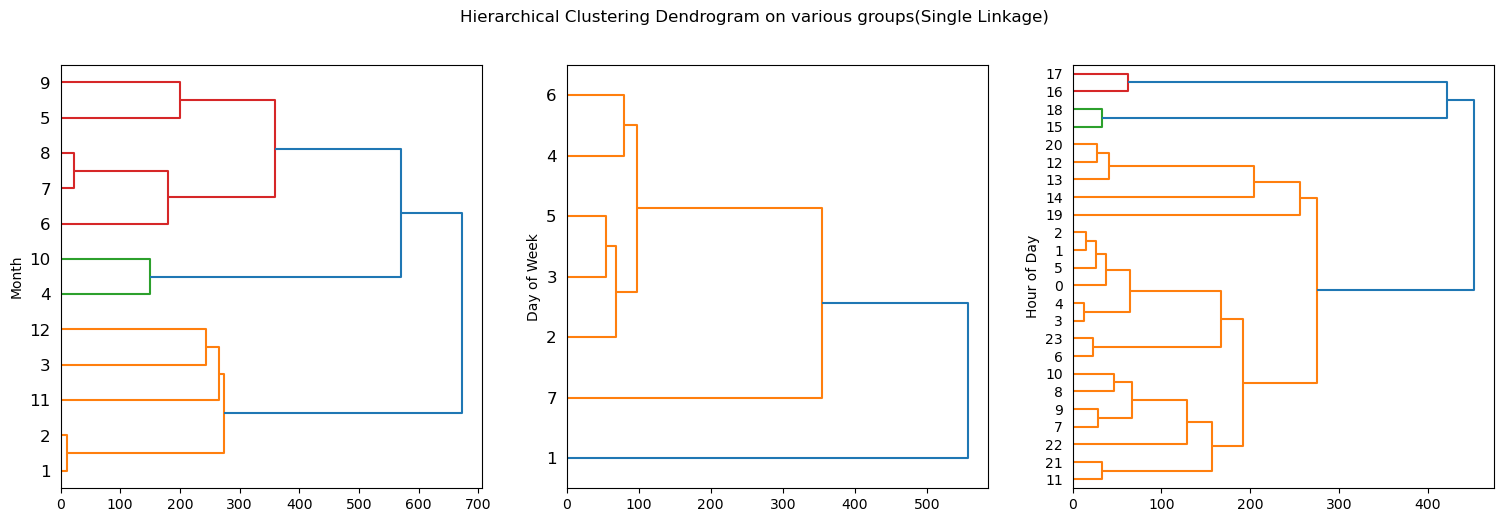

In [59]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline
#Month, Hour of Day, Month/Year, County

figure, axis = plt.subplots(1,3)
dataH = data[['Bicycle Count', 'Bicycle Death Count', 'Bicycle Suspected Serious Injury Count', 'Crash Month', 'Day of Week', 'Hour of Day']]
verte2 = dataH[['Bicycle Count', 'Bicycle Death Count', 'Bicycle Suspected Serious Injury Count', 'Crash Month']].groupby('Crash Month').sum()
verte2 = verte2.reset_index()

data2 = verte2.drop('Crash Month', axis=1)
verte2
names2 = verte2['Crash Month'].compute()
X2=data2
#X = data.drop(['Name','Class'],axis=1)
Z2 = hierarchy.linkage(X2.values, 'single')
# plot the top three levels of the dendrogram
hierarchy.dendrogram(Z2,labels=names2.tolist(),orientation='right', ax = axis[0])
axis[0].set_ylabel("Month")

verte2 = dataH[['Bicycle Count', 'Bicycle Death Count', 'Bicycle Suspected Serious Injury Count', 'Day of Week']].groupby('Day of Week').sum()
verte2 = verte2.reset_index()

data2 = verte2.drop('Day of Week',axis=1)
verte2
names2 = verte2['Day of Week'].compute()
X2=data2
#X = data.drop(['Name','Class'],axis=1)
Z2 = hierarchy.linkage(X2.values, 'single')
# plot the top three levels of the dendrogram
hierarchy.dendrogram(Z2,labels=names2.tolist(),orientation='right', ax = axis[1])
axis[1].set_ylabel("Day of Week")

verte2 = dataH[['Bicycle Count', 'Bicycle Death Count', 'Bicycle Suspected Serious Injury Count', 'Hour of Day']].groupby('Hour of Day').sum()
verte2 = verte2.reset_index()

data2 = verte2.drop('Hour of Day',axis=1)
verte2
names2 = verte2['Hour of Day'].compute()
X2=data2
#X = data.drop(['Name','Class'],axis=1)
Z2 = hierarchy.linkage(X2.values, 'single')
# plot the top three levels of the dendrogram
hierarchy.dendrogram(Z2,labels=names2.tolist(),orientation='right', ax = axis[2])
axis[2].set_ylabel("Hour of Day")


#plt.title("Hierarchical Clustering Dendrogram on various groups(Single Linkage)")
figure.set_size_inches(18.5, 5.5, forward=True)
figure.suptitle("Hierarchical Clustering Dendrogram on various groups(Single Linkage)")
plt.show()

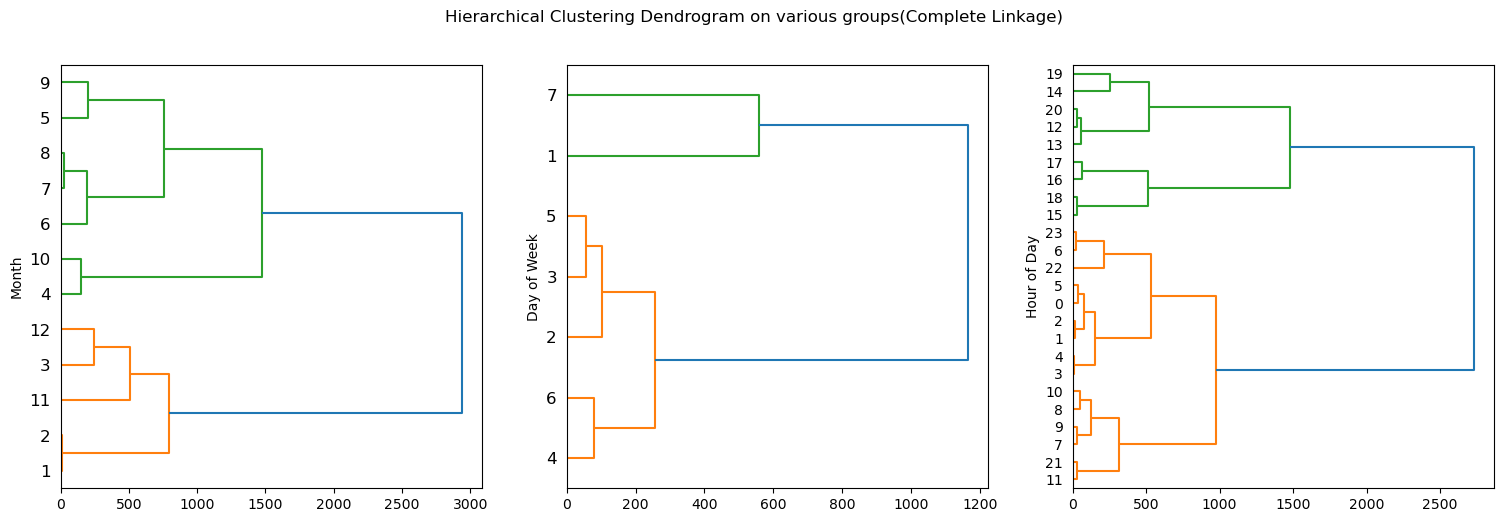

In [60]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline
#Month, Hour of Day, Month/Year, County

figure, axis = plt.subplots(1,3)
dataH = data[['Bicycle Count', 'Bicycle Death Count', 'Bicycle Suspected Serious Injury Count', 'Crash Month', 'Day of Week', 'Hour of Day']]
verte2 = dataH[['Bicycle Count', 'Bicycle Death Count', 'Bicycle Suspected Serious Injury Count', 'Crash Month']].groupby('Crash Month').sum()
verte2 = verte2.reset_index()

data2 = verte2.drop('Crash Month', axis=1)
verte2
names2 = verte2['Crash Month'].compute()
X2=data2
#X = data.drop(['Name','Class'],axis=1)
Z2 = hierarchy.linkage(X2.values, 'complete')
# plot the top three levels of the dendrogram
hierarchy.dendrogram(Z2,labels=names2.tolist(),orientation='right', ax = axis[0])
axis[0].set_ylabel("Month")

verte2 = dataH[['Bicycle Count', 'Bicycle Death Count', 'Bicycle Suspected Serious Injury Count', 'Day of Week']].groupby('Day of Week').sum()
verte2 = verte2.reset_index()

data2 = verte2.drop('Day of Week',axis=1)
verte2
names2 = verte2['Day of Week'].compute()
X2=data2
#X = data.drop(['Name','Class'],axis=1)
Z2 = hierarchy.linkage(X2.values, 'complete')
# plot the top three levels of the dendrogram
hierarchy.dendrogram(Z2,labels=names2.tolist(),orientation='right', ax = axis[1])
axis[1].set_ylabel("Day of Week")

verte2 = dataH[['Bicycle Count', 'Bicycle Death Count', 'Bicycle Suspected Serious Injury Count', 'Hour of Day']].groupby('Hour of Day').sum()
verte2 = verte2.reset_index()

data2 = verte2.drop('Hour of Day',axis=1)
verte2
names2 = verte2['Hour of Day'].compute()
X2=data2
#X = data.drop(['Name','Class'],axis=1)
Z2 = hierarchy.linkage(X2.values, 'complete')
# plot the top three levels of the dendrogram
hierarchy.dendrogram(Z2,labels=names2.tolist(),orientation='right', ax = axis[2])
axis[2].set_ylabel("Hour of Day")


#plt.title("Hierarchical Clustering Dendrogram on various groups(Single Linkage)")
figure.set_size_inches(18.5, 5.5, forward=True)
figure.suptitle("Hierarchical Clustering Dendrogram on various groups(Complete Linkage)")
plt.show()

# Lat-Long

<AxesSubplot: title={'center': 'Lat-Long Scatter of Sampled Crashes'}, xlabel='Longitude(Decimal)', ylabel='Latitude(Decimal)'>

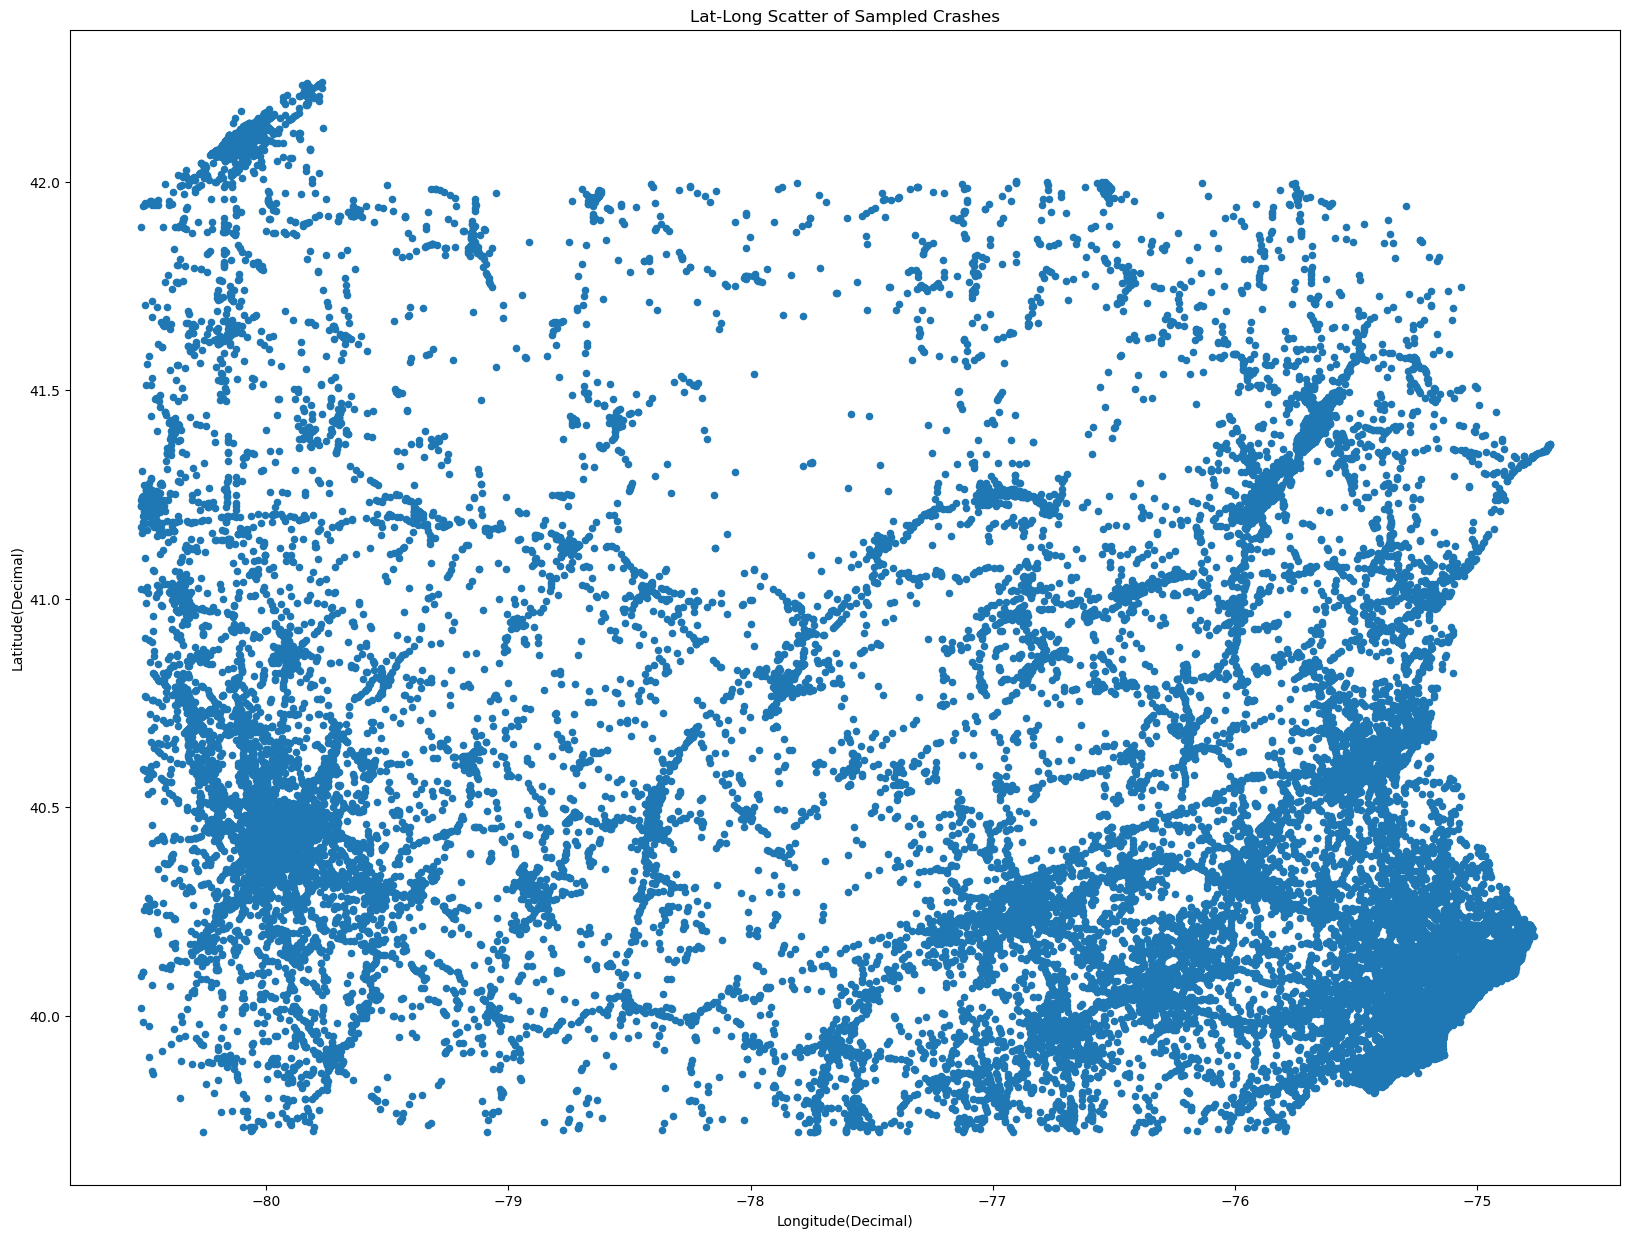

In [12]:
data = df[['Latitude (Decimal)',
 'Longitude (Decimal)']].dropna().sample(frac=1)
data = data.rename(columns={"Latitude (Decimal)": "y", "Longitude (Decimal)": "x"})
data.compute().plot.scatter(x='x',y='y', xlabel="Longitude(Decimal)", ylabel="Latitude(Decimal)", title="Lat-Long Scatter of Sampled Crashes", figsize=(20,15))

## DBSCAN

<AxesSubplot: title={'center': 'Lat-Long DBSCAN Clustering of Sampled Crashes'}, xlabel='Longitude(Decimal)', ylabel='Latitude(Decimal)'>

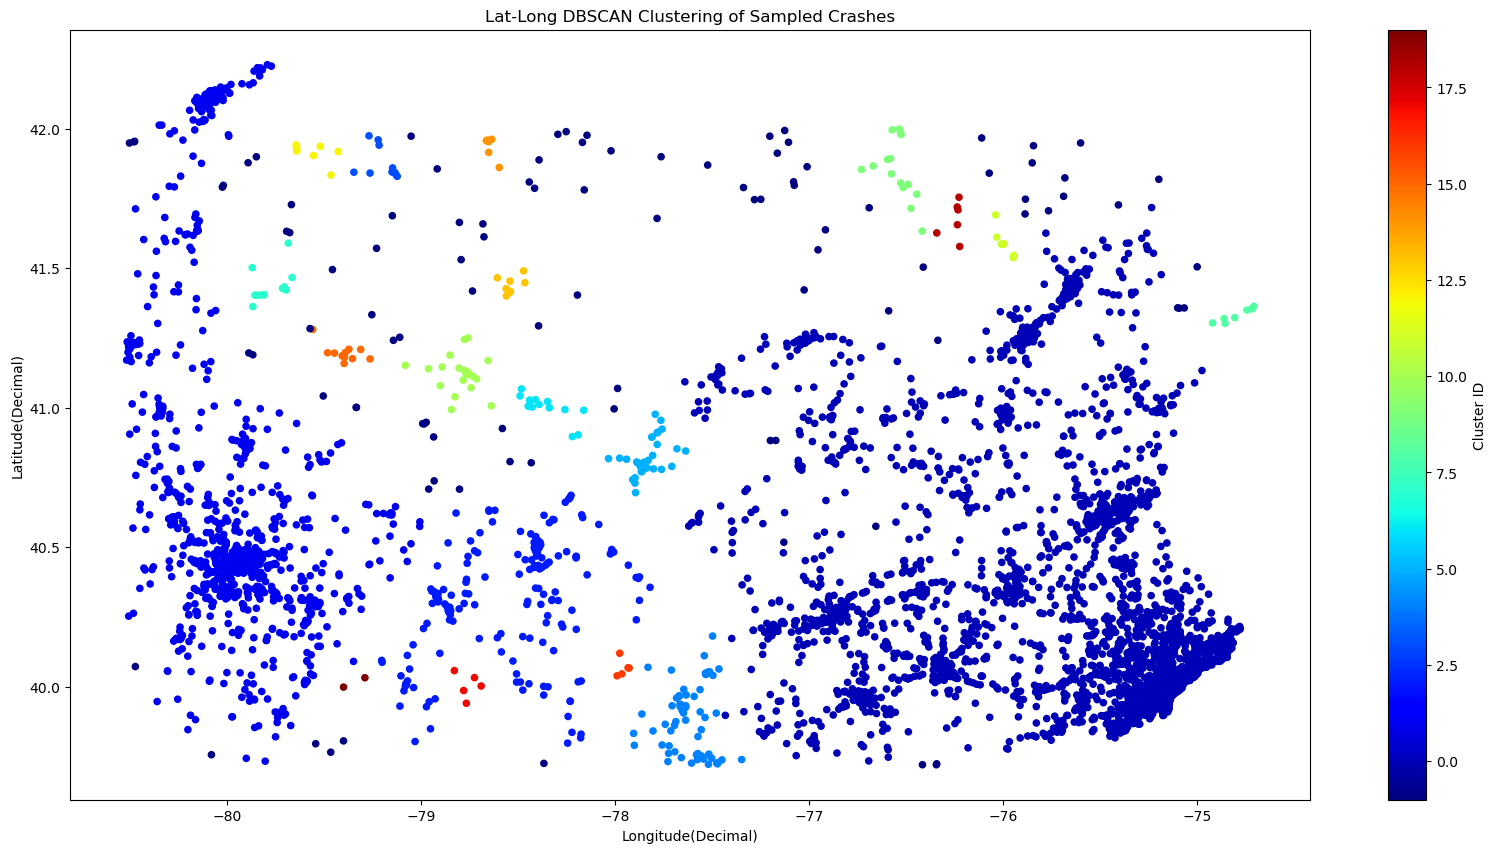

In [29]:
from sklearn.cluster import DBSCAN
data = df[['Latitude (Decimal)',
 'Longitude (Decimal)']].dropna().sample(frac=0.1)
data = df[['Latitude (Decimal)',
 'Longitude (Decimal)']].dropna().sample(frac=0.1)
data = data.rename(columns={"Latitude (Decimal)": "y", "Longitude (Decimal)": "x"})
data2 = data.compute()
data2.reset_index(inplace=True, drop=True)
#with joblib.parallel_backend('dask'):

db = DBSCAN(eps=0.125, min_samples=5).fit(data2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data2,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet', xlabel="Longitude(Decimal)", ylabel="Latitude(Decimal)", title="Lat-Long DBSCAN Clustering of Sampled Crashes")

In [11]:
result['Cluster ID'].unique()

array([ 0,  1,  2,  3,  4,  5,  6, 18,  7,  8,  9, 10, -1, 11, 12, 13, 14,
       15, 16, 17, 20, 19])

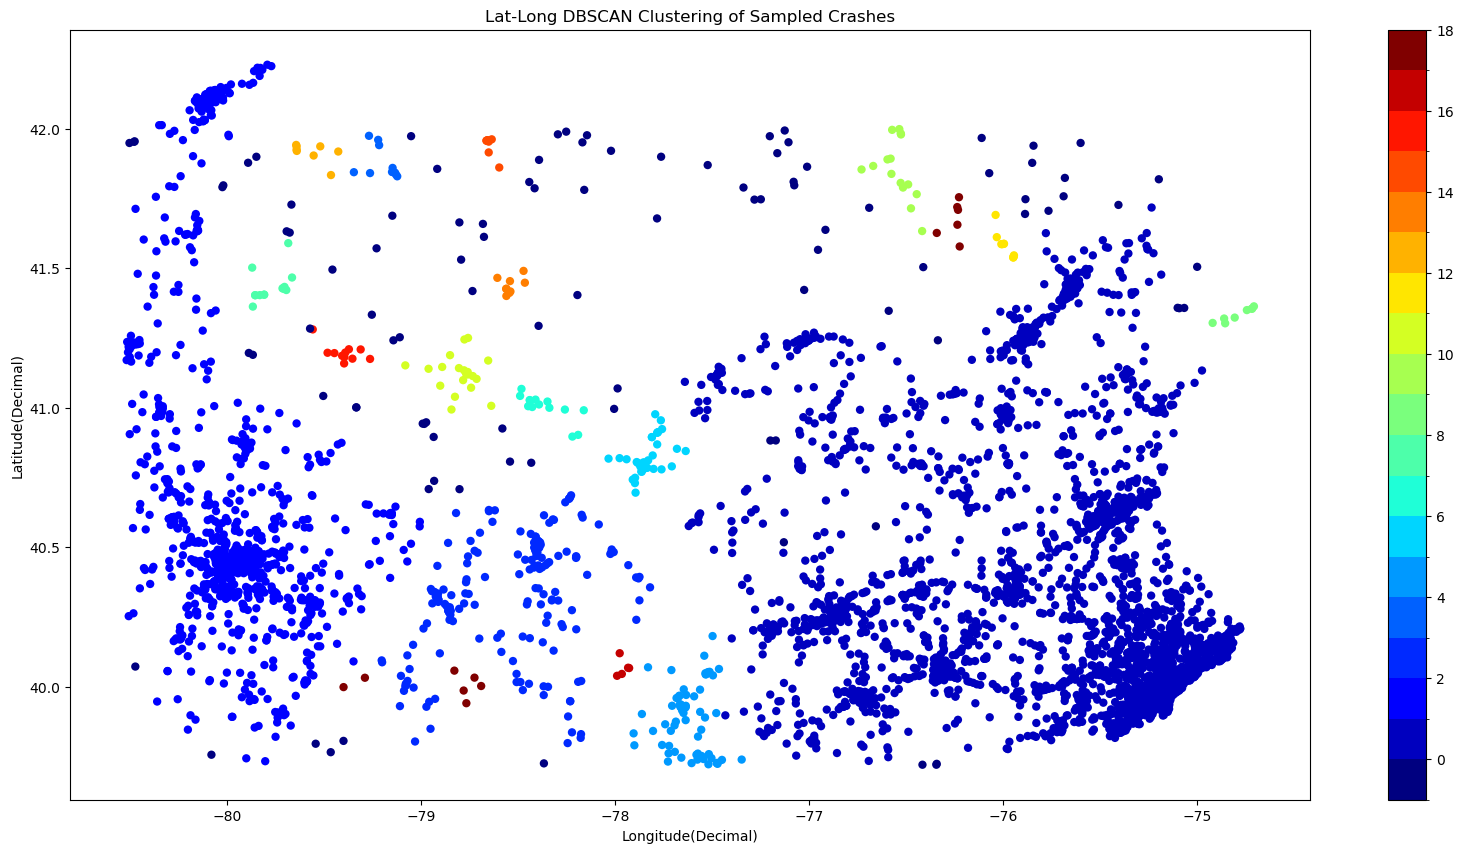

In [30]:
from matplotlib import pyplot as plt
from matplotlib import colors
cmap = plt.cm.jet
clusters = result['Cluster ID'].unique()
norm = colors.BoundaryNorm(np.arange(clusters.min(), clusters.max(), 1), cmap.N)
plt.rcParams["figure.figsize"] = (20,10)

plt.scatter(result.x, result.y, c=result['Cluster ID'], cmap=cmap, norm=norm, edgecolor='none')
#plt.colorbar(ticks=np.linspace(0, 2, 5))
plt.colorbar()
plt.xlabel('Longitude(Decimal)')
plt.ylabel('Latitude(Decimal)')
plt.title('Lat-Long DBSCAN Clustering of Sampled Crashes')
plt.show()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

#result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet', xlabel="Longitude(Decimal)", ylabel="Latitude(Decimal)", title="Lat-Long DBSCAN Clustering of Sampled Crashes")

## K-Means

Text(0, 0.5, 'SSE')

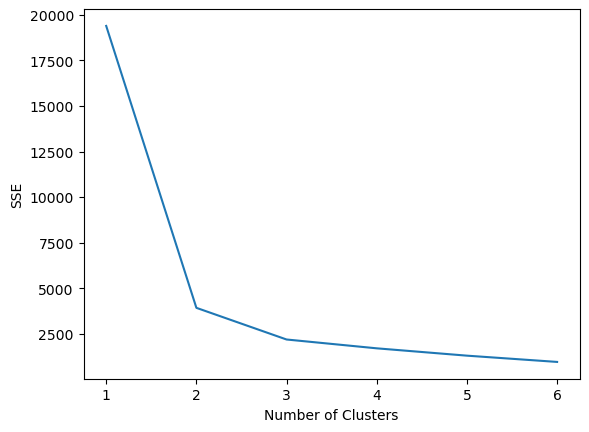

In [14]:
import matplotlib.pyplot as plt
from sklearn import cluster

%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [15]:
k_means = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
k_means.fit(data) 
##labels = k_means.labels_
##pd.DataFrame(labels, columns=['Cluster ID'])
k_means.cluster_centers_

array([[ 40.7337123 , -79.71465718],
       [ 40.25346434, -75.33843985],
       [ 40.37302898, -76.84002349]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


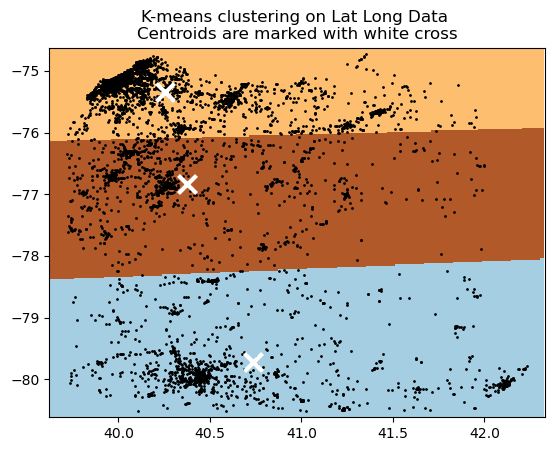

In [16]:
# Plot the decision boundary. For that, we will assign a color to each

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].
reduced_data = data.compute().to_numpy()
x_min, x_max = reduced_data[:, 0].min() - 0.1, reduced_data[:, 0].max() + 0.1
y_min, y_max = reduced_data[:, 1].min() - 0.1, reduced_data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = k_means.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on Lat Long Data \n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.xticks(())
#plt.yticks(())
plt.show()